# Geerts Arbitrator - Egocentric MF-SR

## Imports

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
os.chdir(sys.path[0]+"/..")
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\GitHub\mixed-coordination-models\sources


In [2]:
from grid_search import random_grid_search, compute_clusters_perfs, plot_two_perfs, plot_all_perfs, plot_local
from grid_search import perform_statical_analyses_pearce, plot_pearce_perfs
from experimental_data import get_pearce_experimental_data
from pearce_protocol import perform_group_pearce, plot_pearce, create_path_main_pearce
from exp3_pearce_protocol import perform_group_exp3_pearce

from environments.HexWaterMaze import EnvironmentParams
from agents.agent import AgentsParams

import warnings
warnings.filterwarnings('ignore')

C:\Users\jrusp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Definition of the experimental data to reproduce

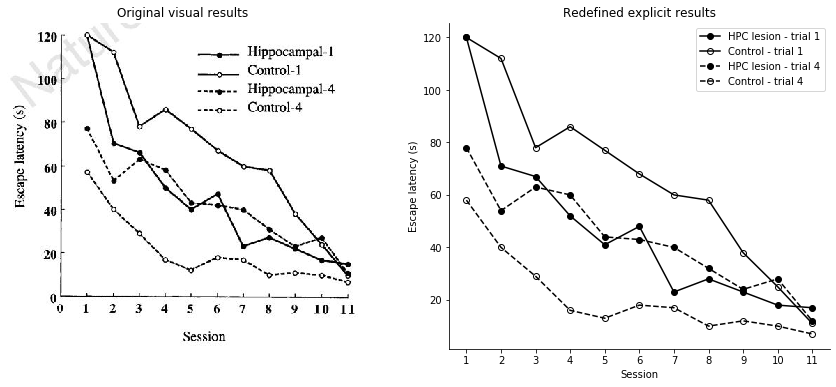

In [3]:
experimental_data_pearce = get_pearce_experimental_data()

## Hyperparameters optimization of Geerts model on Pearce (1998) data

#### Simulation of 2000 datapoints

In [4]:
path = "geerts_ego_SR"

In [5]:
function = "main_pearce"
n_datapoints = 2000
mf_allo = False
dolle = False
HPCmode = "SR"
range_srlr = (0.01, 0.4)
range_qlr = (0.01, 0.4)
range_gamma = (0.7, 0.99)
range_inv_temp = (5, 150)
eta = 0.03

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, range_srlr=range_srlr, range_qlr=range_qlr, eta=eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp, random=False)

#### Clustering of the mean performances of 2000 local groups of datapoints

In [6]:
compute_clusters_perfs(path, experimental_data_pearce, relative=True)

Using 2000 remaining datapoints


#### Removal of clusters that do not validate the required statistical tests

In [7]:
perform_statical_analyses_pearce(path, p=0.05)

Retrieving all agents data
Performing ANOVA


#### Plotting of the sets of parameters associated with the lowest MSE for each 2D bin
White bins means that no datapoints in the bin satisfied all the statistical tests.
Sets of parameters that did not satisfy the statistical tests are not added to the results

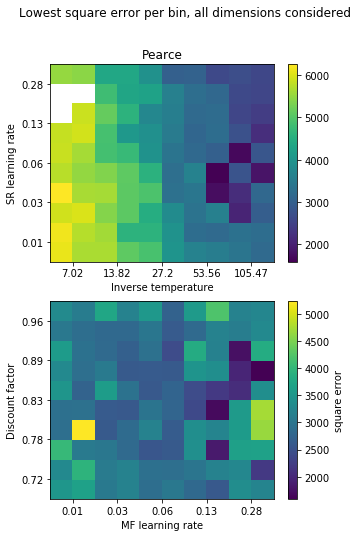

Best three sets of parameters on Pearce's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce
180,0.05183,0.22037,0.86682,75.43,0.03,1591.168374
768,0.09010,0.15168,0.83230,89.27,0.03,1686.731016
250,0.04033,0.21453,0.89551,71.70,0.03,1742.486411


Index of the best 3 sets of parameters: [180, 768, 250]


In [8]:
res_df = plot_pearce_perfs(path, size_plot=10, relative=True)

### Awaited performances of the set of parameters at index 180
These results are predictions based on the grid-search data

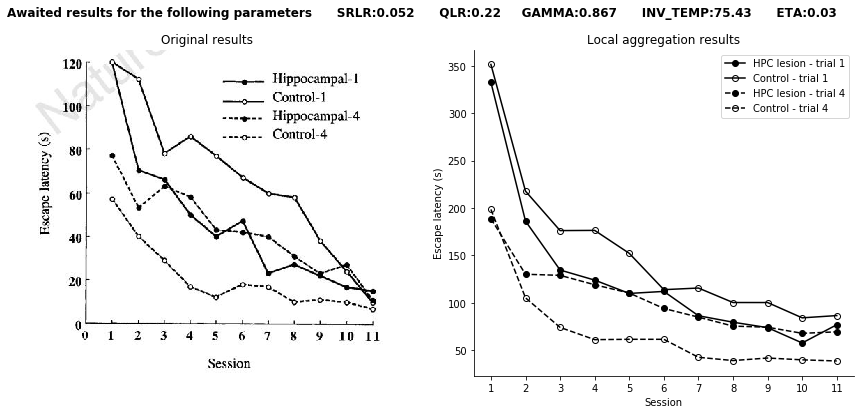

In [9]:
plot_local("main_pearce", res_df,180)

#### Second simulation of 2000 datapoints, on a subset of the multidimensional parameter space from the first grid-search.
This is to get more accurate predictions

In [10]:
path = "geerts_ego_SR2"

In [11]:
function = "main_pearce"
n_datapoints = 2000
mf_allo = False
dolle = False
HPCmode = "SR"
range_srlr = (0.02, 0.13)
range_qlr = (0.1, 0.4)
range_gamma = (0.75, 0.95)
range_inv_temp = (40, 150)
eta = 0.03

random_grid_search(path, function, n_datapoints, mf_allo, dolle, HPCmode, range_srlr=range_srlr, range_qlr=range_qlr, eta=eta, range_gamma=range_gamma, range_inv_temp=range_inv_temp, random=False)

#### Clustering of the mean performances of 2000 local groups of datapoints

In [12]:
compute_clusters_perfs(path, experimental_data_pearce, relative=True)

Using 2000 remaining datapoints


#### Removal of clusters that do not validate the required statistical tests

In [13]:
# the list of p-values required for each test can be found and modified in the 
# perform_statical_analyses_pearce() function, in the grid_search.py module
perform_statical_analyses_pearce(path, p=0.05)

Retrieving all agents data
Performing ANOVA


#### Plotting of the sets of parameters associated with the lowest MSE for each 2D bin
White bins means that no datapoints in the bin satisfied all the statistical tests.
Sets of parameters that did not satisfy the statistical tests are not added to the results

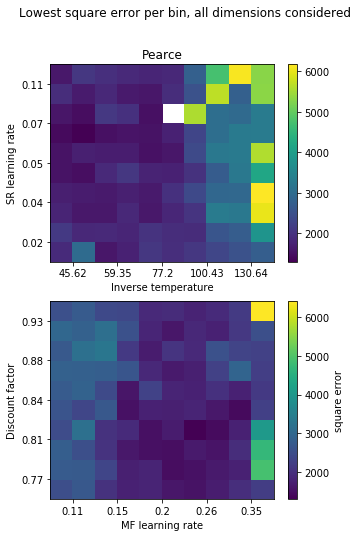

Best three sets of parameters on Pearce's data


,srlr_centroid,qlr_centroid,gamma_centroid,inv_temp_centroid,eta_centroid,se_cluster_pearce
1506,0.07449,0.25591,0.81899,49.98,0.03,1298.040476
1894,0.07795,0.29883,0.83200,47.10,0.03,1430.953089
1296,0.08191,0.27360,0.80736,52.79,0.03,1454.407921


Index of the best 3 sets of parameters: [1506, 1894, 1296]


In [14]:
res_df = plot_pearce_perfs(path, size_plot=10, relative=True)

### Awaited performances of the set of parameters at index 1506 on Pearce's protocol
These results are predictions based on the grid-search data

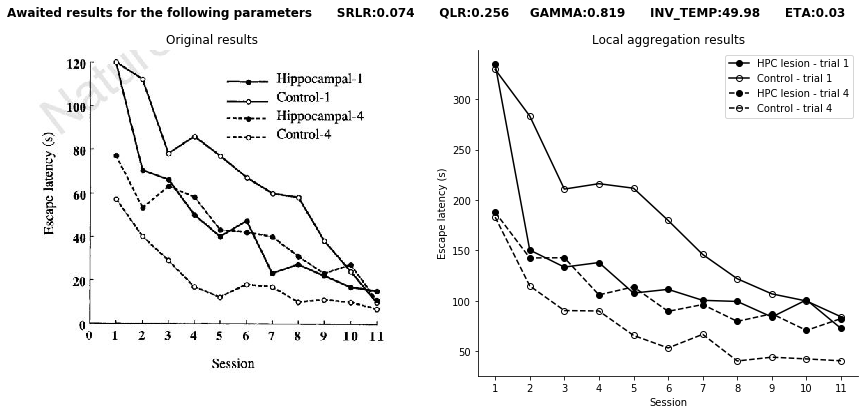

In [15]:
plot_local("main_pearce", res_df,1506)

# Testing the grid-search predictions: Pearce, Roberts, Good (1998) experiment

## Control agents training

In [16]:
env_params = EnvironmentParams()
env_params.maze_size = 10
env_params.n_sessions = 11
env_params.n_trials = 4
env_params.n_agents = 100
env_params.init_sr = "zero"
env_params.landmark_dist = 4
env_params.time_limit = 500
env_params.starting_states = [243,230,270,257]

ag_params = AgentsParams()
ag_params.mf_allo = False
ag_params.hpc_lr = 0.074
ag_params.q_lr = 0.256
ag_params.inv_temp = 50
ag_params.gamma = 0.82
ag_params.eta = 0.03 # reliability learning rate
ag_params.alpha1 = 0.01
ag_params.beta1 = 0.1
ag_params.A_alpha = 3.2 # Steepness of transition curve MF to SR
ag_params.A_beta = 1.1 # Steepness of transition curve SR to MF
ag_params.HPCmode = "SR"
ag_params.lesion_HPC = False
ag_params.lesion_DLS = False
ag_params.dolle = False

In [17]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100False0.0740.256500.820.030.010.13.21.14SR500FalseFalseFalse'

Computing the mean performances of the agents...

Computing ANOVA on trial...
                 sum_sq    df           F        PR(>F)
C(trial)  241530.933715   1.0  166.466955  7.535260e-23
Residual  142190.571326  98.0         NaN           NaN


Computing ANOVA on session...
                   sum_sq    df          F        PR(>F)
C(session)  666854.486570   1.0  69.052069  5.513536e-13
Residual    946412.475305  98.0        NaN           NaN

Computing the heading-vectors of each strategy...



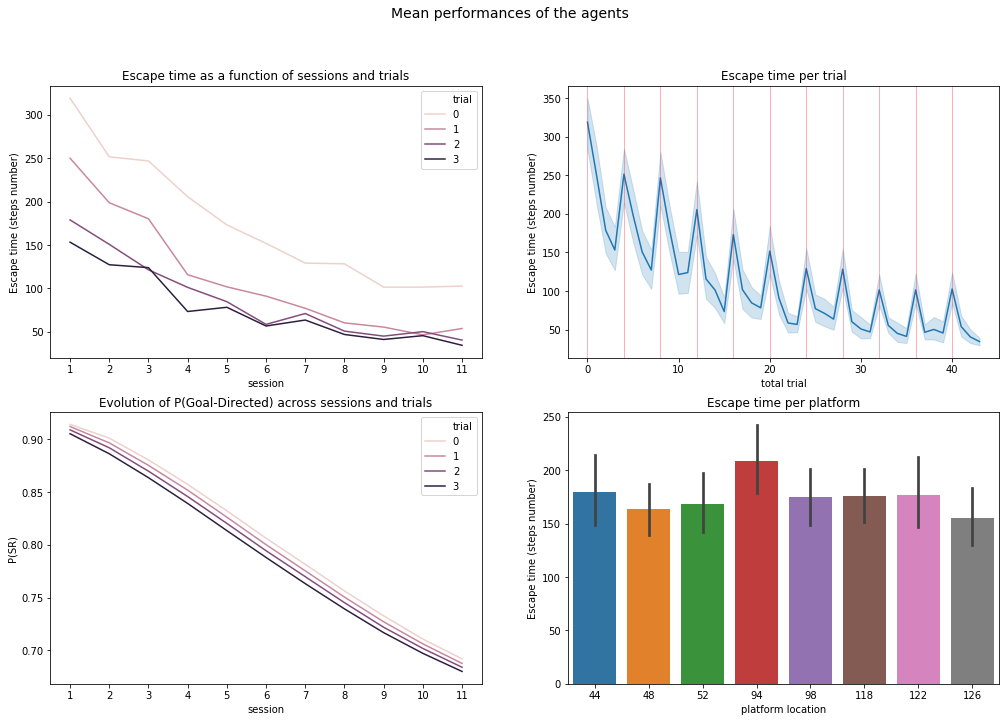

<Figure size 432x288 with 0 Axes>

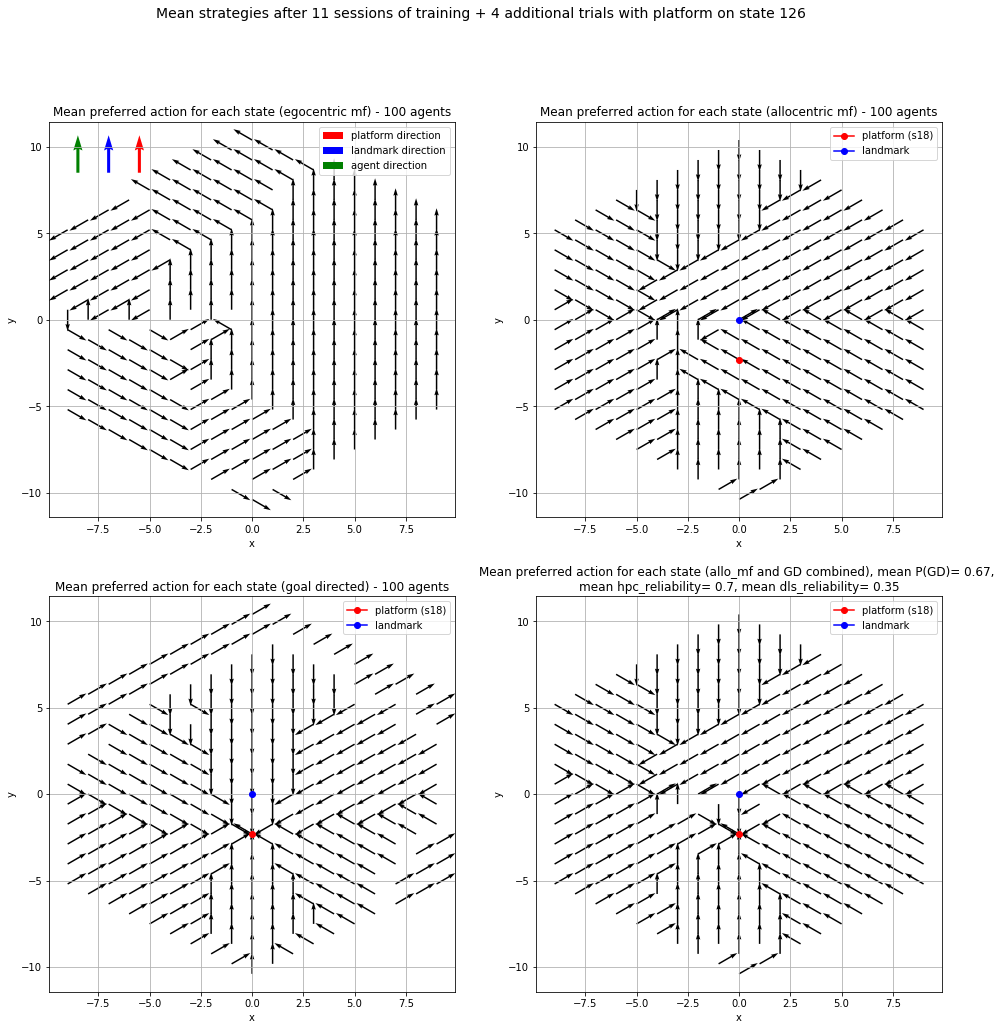

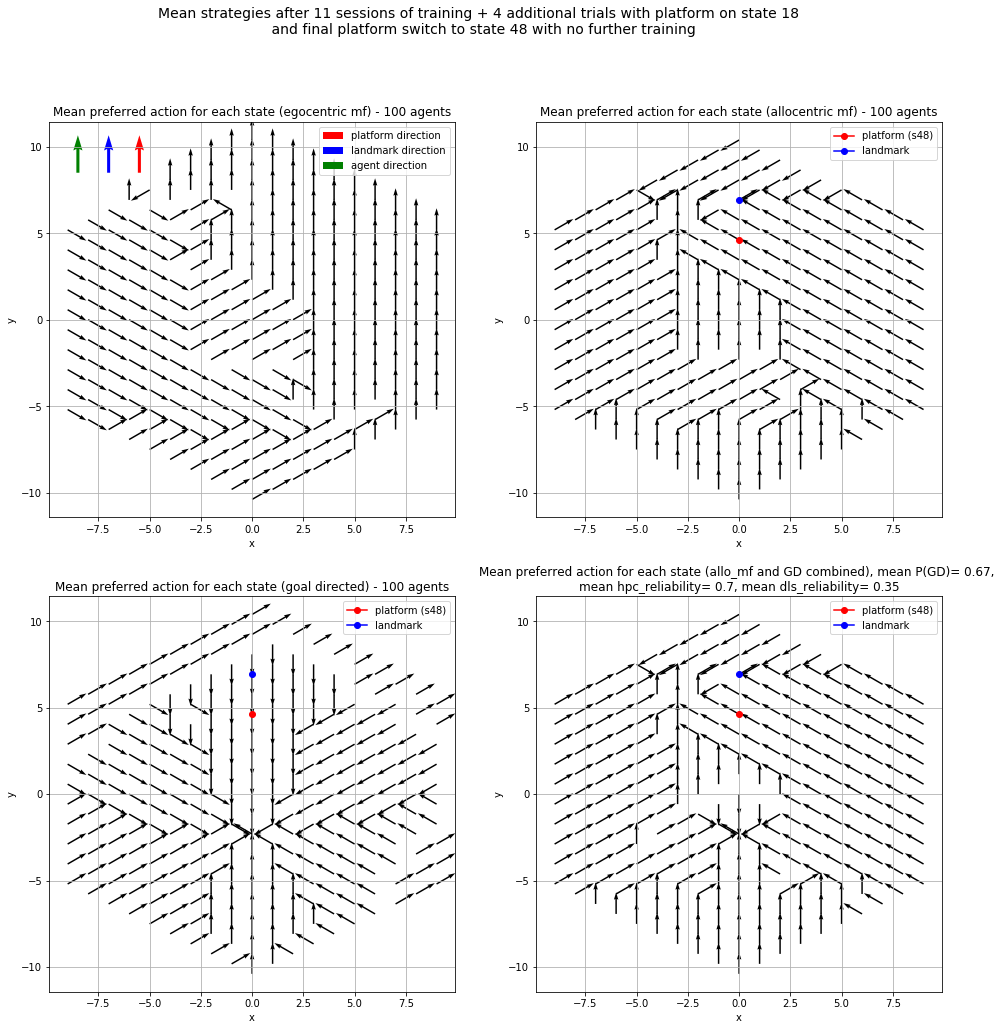

In [18]:
perform_group_pearce(env_params, ag_params, seed=1)

## Lesioned agents training

In [19]:
ag_params.lesion_HPC = True

In [20]:
create_path_main_pearce(env_params, ag_params) # data is stored here

'pearce_10411100False0.0740.256500.820.030.010.13.21.14SR500TrueFalseFalse'

Computing the mean performances of the agents...

Computing ANOVA on trial...
                 sum_sq    df         F    PR(>F)
C(trial)    3031.160000   1.0  1.512065  0.221768
Residual  196455.573554  98.0       NaN       NaN


Computing ANOVA on session...
                   sum_sq    df          F        PR(>F)
C(session)  641160.525625   1.0  64.925189  1.911311e-12
Residual    967786.656250  98.0        NaN           NaN

Computing the heading-vectors of each strategy...



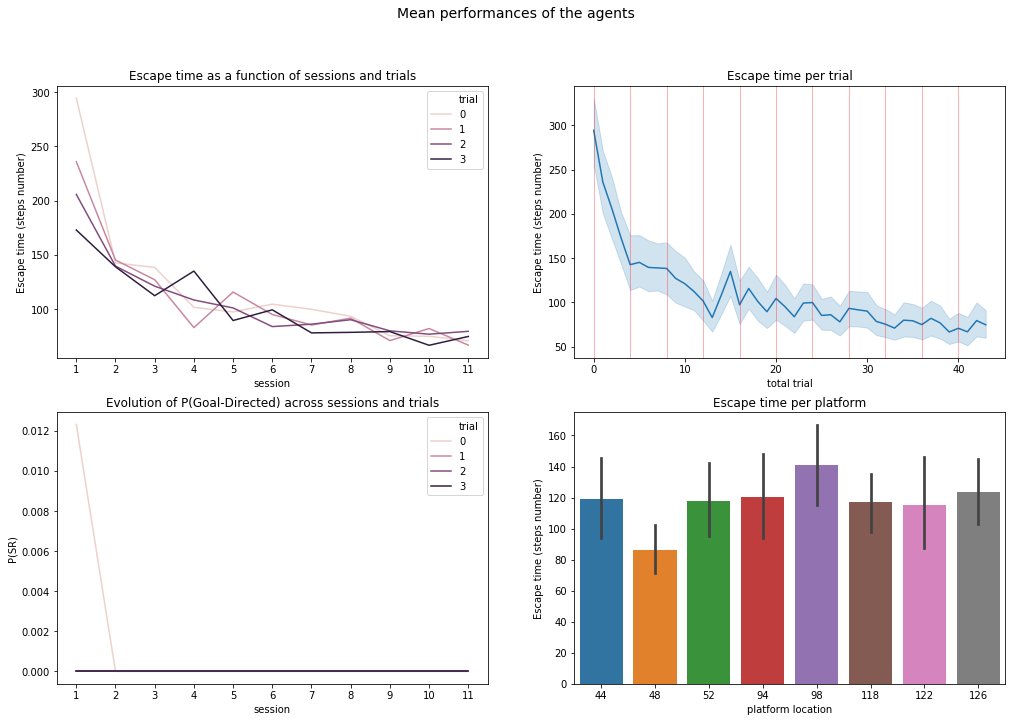

<Figure size 432x288 with 0 Axes>

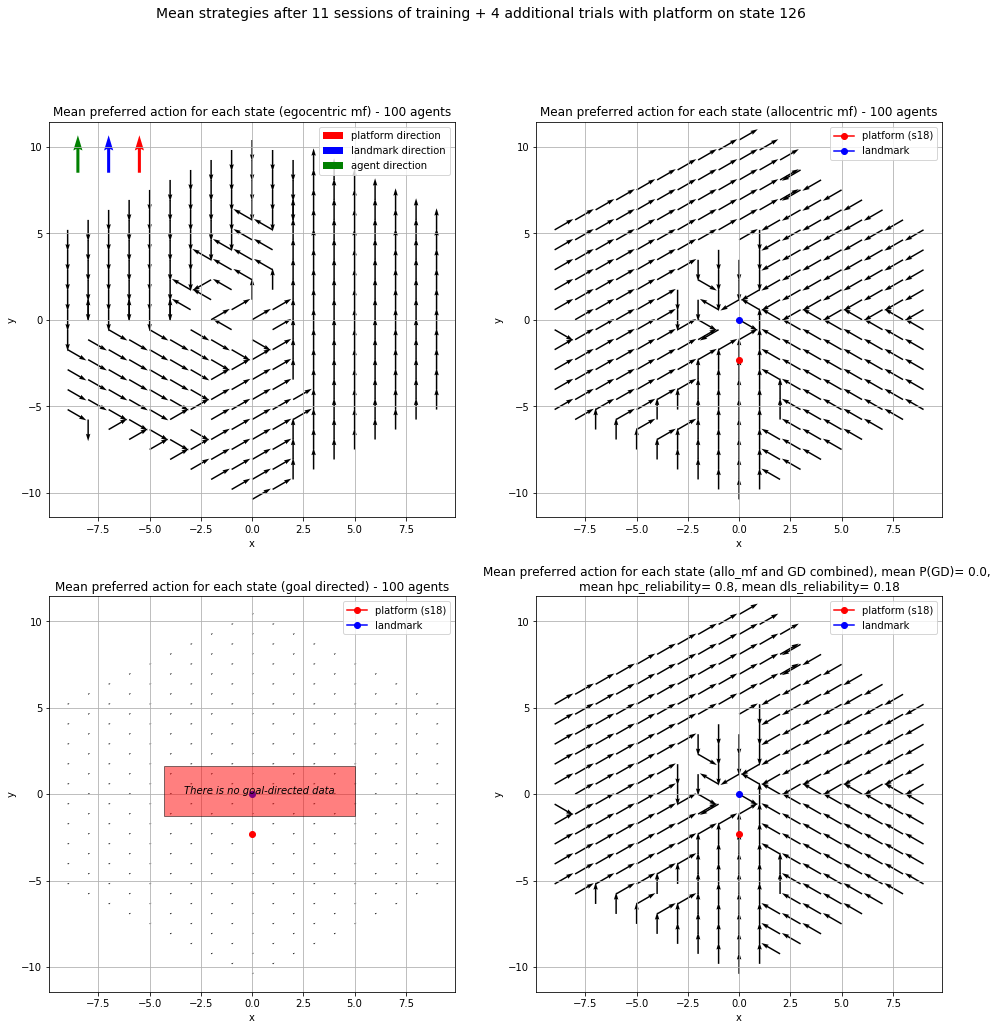

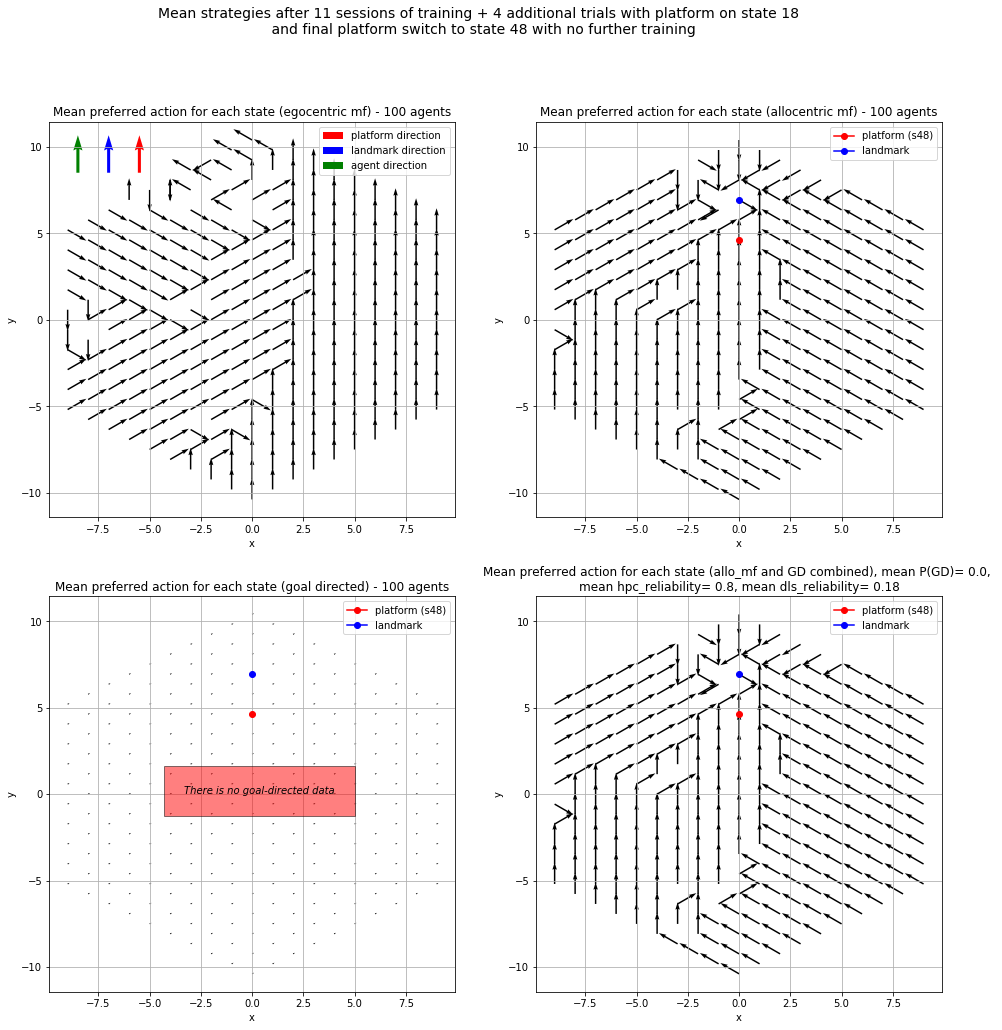

In [21]:
perform_group_pearce(env_params, ag_params, seed=2)

Mean Square Error:  500.7337009144702


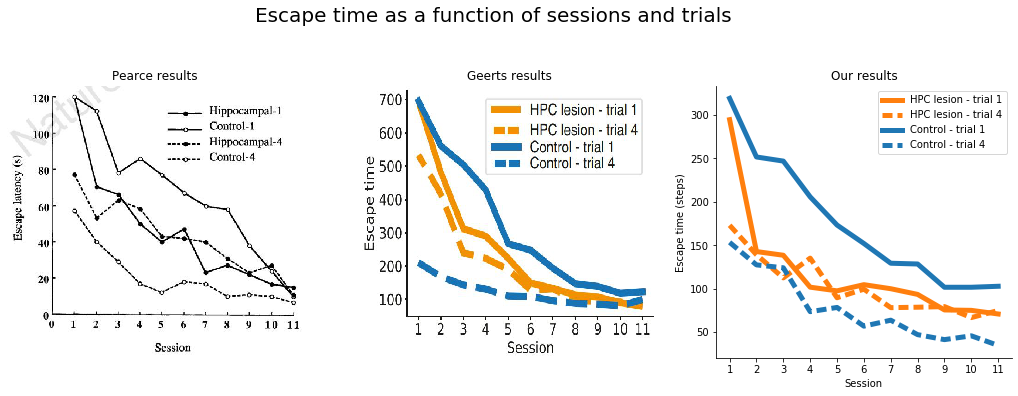


Computing ANOVA to test difference between trial 1 of group normal and group lesioned...
                 sum_sq     df          F        PR(>F)
C(group)  157891.346942    1.0  67.373213  2.835187e-14
Residual  464019.529091  198.0        NaN           NaN


Computing ANOVA to test difference between trial 4 of group normal and group lesioned...
                 sum_sq     df         F    PR(>F)
C(group)   32512.500000    1.0  24.60998  0.000002
Residual  261579.851074  198.0       NaN       NaN



In [22]:
plot_pearce(env_params, ag_params, experimental_data=experimental_data_pearce)